In [14]:
# this is for generating output of the autoencoder, which will be fed into the LSTM
# for now just saving images from the first movie --> then I will scale up

# import libraries
import tensorflow as tf
from ConvoAutoencoder import ConvoAutoencoder
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from data_utils import read_images
from data_utils_local08 import *
from conv_vae import *
import cv2
from matplotlib.pyplot import imshow
import math

In [2]:
# start TF session
sess = tf.InteractiveSession()

In [3]:
# rejuvenate the trained variables
reawakened = tf.train.import_meta_graph('my_ckpts/trained_auto02.meta')
reawakened.restore(sess, tf.train.latest_checkpoint('my_ckpts/'))

INFO:tensorflow:Restoring parameters from my_ckpts/trained_auto02


In [4]:
# restoration
saver = tf.train.import_meta_graph('./my_ckpts/trained_auto02.meta')
path = tf.train.latest_checkpoint('./my_ckpts')
saver.restore(sess, path)

INFO:tensorflow:Restoring parameters from ./my_ckpts/trained_auto02


In [36]:
# choose a random frame from the second to send through the autoencoder

# set up a video capture object for movie 07, and get its framerate
vidcap = cv2.VideoCapture("data_movies/MEDIAEVAL18_07.mp4")
frame_rate = math.floor(vidcap.get(cv2.CAP_PROP_FPS))
print(frame_rate)

# getting the first frame and running through the whole shebang
# success, img = vidcap.read() 
# img = downsize_forAuto(img)

# get total number of frames in the movie
num_frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
# get the number of seconds in the movie by dividing by frames per second 
num_secs = round(num_frames/frame_rate)
print(num_secs)
# set up the shape of the auto_output array
auto_output = np.zeros([num_secs, 64, 64, 3])

# for looping through the entire movie
# iterate through each second in the movie
for i in range(num_secs):
    # select the following frame number and index from the movie data matrix
    frame_index = i * frame_rate #this will select the first frame from every second I believe
    # set the vidcap frame position and read that frame
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    _, img = vidcap.read()
    img = downsize_forAuto(img)

    # feed this frame of data through the autoencoder
    test_image = sess.graph.get_tensor_by_name("Placeholder:0")
    # restore the operation sigmoid
    sigmoid = sess.graph.get_tensor_by_name("Sigmoid:0")

    output_images = sess.run(sigmoid, feed_dict={test_image: img[np.newaxis, :, :, :]})
    output_images = output_images * 255
    output_images = output_images.astype(np.uint8)

    # save the output image into the output array
    auto_output[i] = output_images[1, :, :, :]

print(auto_output)

29
217
[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]


 [[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 

In [ ]:
# save the auto encoder outputs to a file

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


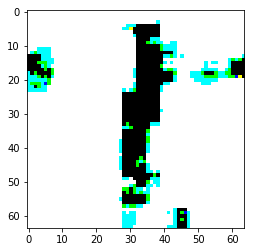

In [41]:
rand_frame = auto_output[200]
plt.imshow(rand_frame)
plt.show()

In [ ]:
# testing the frameid feature --> it works!
vidcap = cv2.VideoCapture("data_movies/MEDIAEVAL18_07.mp4")
success, img = vidcap.read()

while success:
    frameid = vidcap.get(cv2.CAP_PROP_POS_FRAMES)
    print(frameid)
    success, img = vidcap.read()

(360, 640, 3)


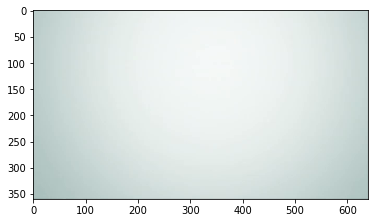

In [23]:
# retrieving a certain frame
vidcap.set(cv2.CAP_PROP_POS_FRAMES, 5)
_, img = vidcap.read()
print(img.shape)
plt.imshow(img)
plt.show()

In [27]:
# send this image through the autoencoder
test_image = sess.graph.get_tensor_by_name("Placeholder:0")
# restore the operation sigmoid
sigmoid = sess.graph.get_tensor_by_name("Sigmoid:0")

output_images = sess.run(sigmoid, feed_dict={test_image: img[np.newaxis, :, :, :]})
output_images = output_images * 255
output_images = output_images.astype(np.uint8)

In [28]:
# save the output image into the output array
auto_output = np.zeros([1, 64, 64, 3])
auto_output = output_images[1, :, :, :]
print(auto_output)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [ ]:
# save this output matrix as a .npy file